# Lab №6

In [736]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import erf
from scipy.stats import chi2, t, zscore

# Исходные данные

In [737]:
x = np.array(
    [128, 132, 129, 126, 130, 128, 129, 129, 127, 130, 128, 131, 127, 129, 127, 131, 130, 127, 130, 128, 129, 129, 126,
     128, 128, 130, 129, 127, 131, 128, 130, 126, 130, 129, 129, 127, 129, 126, 130, 126, 130, 129, 127, 129, 130, 128,
     131, 127, 132, 129, 129, 129, 130, 129, 130, 129, 128, 129, 127, 131, 129, 131, 128, 132, 128, 126, 129, 128, 128,
     129, 127, 128, 128, 130, 128, 127, 129, 128, 131, 129, 127, 130, 126, 131, 130, 129, 129, 127, 132, 127, 130, 128,
     128, 130, 129, 131, 127, 129, 130, 131, ])

y = np.array(
    [25, 31, 27, 25, 28, 27, 26, 28, 26, 27, 26, 28, 27, 28, 26, 28, 28, 26, 27, 27, 26, 28, 25, 27, 26, 27, 26, 26, 29,
     27, 29, 25, 27, 27, 27, 26, 28, 25, 29, 25, 28, 27, 26, 29, 28, 27, 29, 26, 30, 29, 27, 26, 28, 27, 28, 26, 25, 28,
     27, 28, 28, 19, 18, 31, 26, 25, 27, 27, 28, 26, 26, 26, 27, 29, 26, 26, 28, 27, 30, 26, 27, 28, 27, 30, 29, 28, 27,
     26, 30, 33, 28, 27, 26, 28, 28, 28, 26, 28, 28, 29, ])

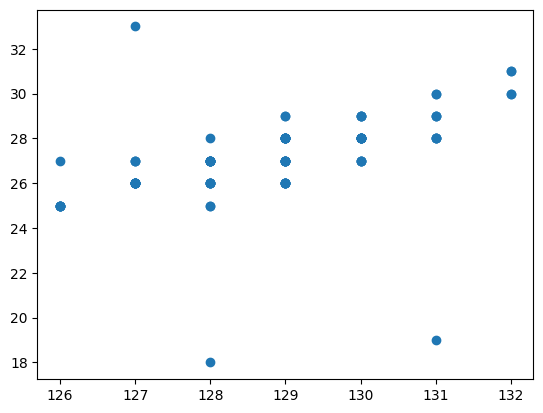

In [738]:
plt.scatter(x, y)

### Фильтрация от выбросов

In [739]:
data = pd.DataFrame({'x': x, 'y': y})
z = np.abs(zscore(data))
data_clean = data[(z < 3).all(axis=1)]
data_clean.shape

(97, 2)

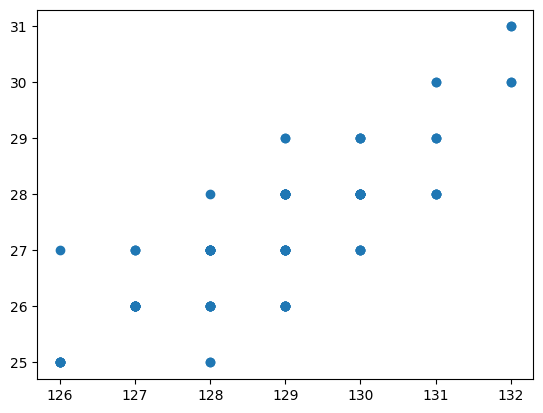

In [740]:
plt.scatter(data_clean['x'], data_clean['y'])

In [741]:
x = np.array(data_clean['x'])
y = np.array(data_clean['y'])

# Группирование данных по интервалам

### Для x

In [742]:
N_x = 7
N_y = 4
n = x.__len__()

In [743]:
h_x = (np.max(x) - np.min(x)) / (N_x - 1)
h_x

1.0

In [744]:
x_intervals = [np.min(x) - h_x / 2, ]
for i in range(1, N_x + 1):
    x_intervals.append(x_intervals[i - 1] + h_x)

x_intervals

[125.5, 126.5, 127.5, 128.5, 129.5, 130.5, 131.5, 132.5]

In [745]:
x_avgs = [x_intervals[0] + h_x / 2, ]
for i in range(2, N_x + 1):
    x_avgs.append((x_intervals[i - 1] + x_intervals[i]) / 2)

x_avgs

[126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0]

In [746]:
m_x = []
for i in range(N_x):
    m_i = 0
    for x_i in x:
        if i == N_x - 1:
            if x_intervals[i] <= x_i <= x_intervals[i + 1]:
                m_i += 1
        else:
            if x_intervals[i] <= x_i < x_intervals[i + 1]:
                m_i += 1
    m_x.append(m_i)

m_x = np.array(m_x)
m_x

array([ 7, 14, 18, 27, 18,  9,  4])

In [747]:
p_x = m_x / n
p_x

array([0.07216495, 0.1443299 , 0.18556701, 0.27835052, 0.18556701,
       0.09278351, 0.04123711])

In [748]:
f_x = p_x / h_x
f_x

array([0.07216495, 0.1443299 , 0.18556701, 0.27835052, 0.18556701,
       0.09278351, 0.04123711])

Проверка условий

In [749]:
np.sum(m_x) == n

True

In [750]:
np.sum(p_x) == 1

True

### Для y

In [751]:
h_y = (np.max(y) - np.min(y)) / (N_y - 1)
h_y

2.0

In [752]:
y_intervals = [np.min(y) - h_y / 2, ]
for i in range(1, N_y + 1):
    y_intervals.append(y_intervals[i - 1] + h_y)

y_intervals

[24.0, 26.0, 28.0, 30.0, 32.0]

In [753]:
y_avgs = [y_intervals[0] + h_y / 2, ]
for i in range(2, N_y + 1):
    y_avgs.append((y_intervals[i - 1] + y_intervals[i]) / 2)

y_avgs

[25.0, 27.0, 29.0, 31.0]

In [754]:
m_y = []
for i in range(N_y):
    m_i = 0
    for y_i in y:
        if i == N_y - 1:
            if y_intervals[i] <= y_i <= y_intervals[i + 1]:
                m_i += 1
        else:
            if y_intervals[i] <= y_i < y_intervals[i + 1]:
                m_i += 1
    m_y.append(m_i)

m_y = np.array(m_y)
m_y

array([ 8, 49, 34,  6])

In [755]:
p_y = m_y / n
p_y

array([0.08247423, 0.50515464, 0.35051546, 0.06185567])

In [756]:
f_y = p_y / h_y
f_y

array([0.04123711, 0.25257732, 0.17525773, 0.03092784])

Проверка условий

In [757]:
np.sum(m_y) == n

True

In [758]:
np.sum(p_y) == 1

True

# Статистический ряд и графики

In [759]:
df_x = pd.DataFrame(
    data={'x_avg_i': x_avgs, 'm_x': m_x, 'p_x': p_x, 'f_x': f_x, })
df_x.T

,0,1,2,3,4,5,6
x_avg_i,126.000000,127.00000,128.000000,129.000000,130.000000,131.000000,132.000000
m_x,7.000000,14.00000,18.000000,27.000000,18.000000,9.000000,4.000000
p_x,0.072165,0.14433,0.185567,0.278351,0.185567,0.092784,0.041237
f_x,0.072165,0.14433,0.185567,0.278351,0.185567,0.092784,0.041237


In [760]:
df_y = pd.DataFrame(
    data={'y_avg_i': y_avgs, 'm_y': m_y,
          'p_y': p_y, 'f_y': f_y})
df_y.T

,0,1,2,3
y_avg_i,25.000000,27.000000,29.000000,31.000000
m_y,8.000000,49.000000,34.000000,6.000000
p_y,0.082474,0.505155,0.350515,0.061856
f_y,0.041237,0.252577,0.175258,0.030928


## Графики

### Для x

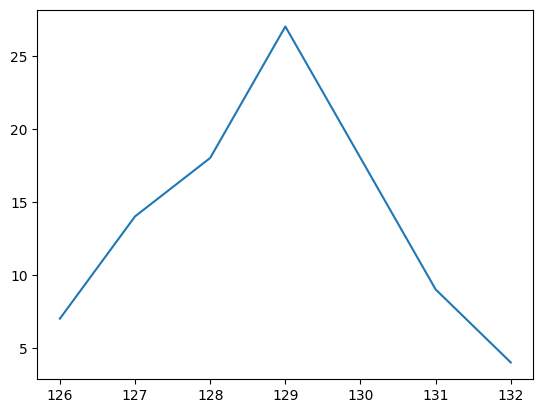

In [761]:
plt.plot(df_x['x_avg_i'], df_x['m_x'])

<BarContainer object of 7 artists>

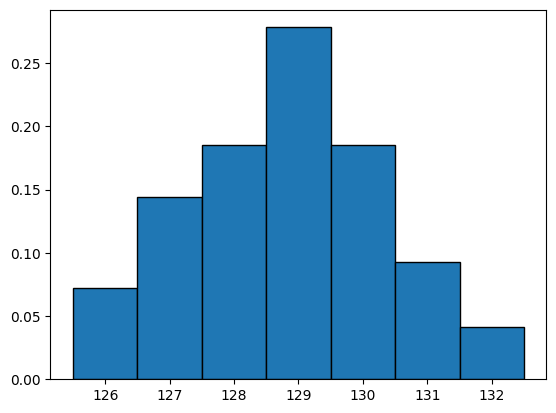

In [762]:
plt.bar(df_x['x_avg_i'], height=df_x['f_x'], width=np.array(x_intervals[:-1]) - np.array(x_intervals[1:]),
        edgecolor='black')

# TODO: отложить три сигмы от среднего выборочного влево и вправо

### Для y

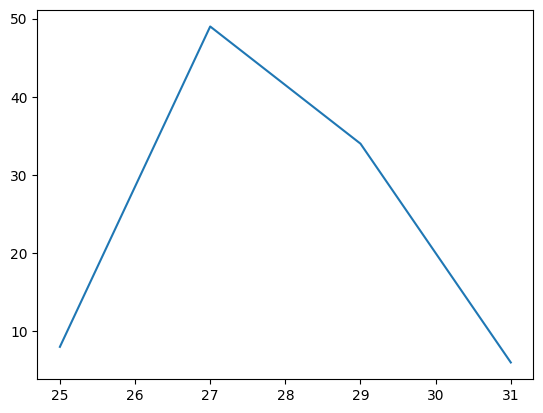

In [763]:
plt.plot(df_y['y_avg_i'], df_y['m_y'])

<BarContainer object of 4 artists>

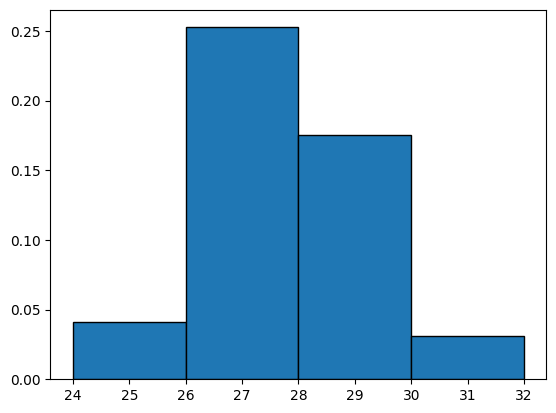

In [764]:
plt.bar(df_y['y_avg_i'], height=df_y['f_y'], width=np.array(y_intervals[:-1]) - np.array(y_intervals[1:]),
        edgecolor='black')

# Числовые характеристики

### Для x

In [765]:
m_k_x = np.array([np.sum(np.power(x_avgs, k) * m_x) for k in range(1, 5)]) / n
m_k_x

array([1.28804124e+02, 1.65928041e+04, 2.13781468e+06, 2.75473969e+08])

In [766]:
x_sample = m_k_x[0]
x_sample

128.8041237113402

In [767]:
s_2_x = m_k_x[1] - x_sample ** 2
s_2_x

2.301838665109244

In [768]:
s_2_x ** .5

1.5171811576437548

In [769]:
s_2_x_corrected = (s_2_x * n) / (n - 1)
s_2_x_corrected

2.325816151204132

In [770]:
a_sample_x = (m_k_x[2] - 3 * m_k_x[0] * m_k_x[1] + 2 * m_k_x[0] ** 3) / s_2_x_corrected ** (3 / 4)
a_sample_x

0.05985043739266462

In [771]:
excess_x = (m_k_x[3] - 4 * m_k_x[0] * m_k_x[2] + 6 * m_k_x[0] ** 2 * m_k_x[1] -
            3 * m_k_x[0] ** 4) / s_2_x_corrected ** 2 - 3
excess_x

-0.6138915249211361

Для больших n

In [772]:
m_k_x_big = np.array([np.sum(np.power(x, k)) for k in range(1, 5)]) / n
m_k_x_big

array([1.28804124e+02, 1.65928041e+04, 2.13781468e+06, 9.80588885e+06])

In [773]:
x_avg_big = np.sum(x) / n
x_avg_big

128.8041237113402

In [848]:
x_avg_big - m_k_x[0]

0.0

In [774]:
s_2_x_big = np.sum((x - x_avg_big) ** 2) / n
s_2_x_big

2.301838665107876

In [775]:
s_2_x_corrected_big = n * s_2_x_big / (n - 1)
s_2_x_corrected_big

2.3258161512027495

In [776]:
a_x_big = (m_k_x_big[2] - 3 * m_k_x_big[0] * m_k_x_big[1] + 2 * m_k_x_big[0] ** 3) / s_2_x_corrected_big ** (3 / 4)
a_x_big

0.05985043739269131

Все числовые характеристики, вычесленные как по формулам для больших, так и для маленьких n, -- одинаковые.

### Для y

In [777]:
m_k_y = np.array([np.sum(np.power(y_avgs, k) * m_y) for k in range(1, 5)]) / n
m_k_y

array([2.77835052e+01, 7.74030928e+02, 2.16230825e+04, 6.05714320e+05])

In [778]:
y_sample = m_k_y[0]
y_sample

27.783505154639176

In [779]:
len(y_avgs)

4

In [780]:
m_k_y

array([2.77835052e+01, 7.74030928e+02, 2.16230825e+04, 6.05714320e+05])

In [781]:
s_2_y = m_k_y[1] - y_sample ** 2
s_2_y

2.107769157189864

In [782]:
s_2_y_corrected = (s_2_y * n) / (n - 1)
s_2_y_corrected

2.1297250859105916

In [783]:
a_sample_y = (m_k_y[2] - 3 * m_k_y[0] * m_k_y[1] + 2 * m_k_y[0] ** 3) / (s_2_y_corrected ** (3 / 4))
a_sample_y

# TODO добавить вычисления для "больших" размеров выборок, сравнить результаты

0.37877777998873624

In [784]:
excess_y = (m_k_y[3] - 4 * m_k_y[0] * m_k_y[2] + 6 * m_k_y[0] ** 2 * m_k_y[1] - 3 * m_k_y[
    0] ** 4) / s_2_y_corrected ** 2 - 3
excess_y

-0.23755025289588483

# Выборочный коэффициент корреляции

In [785]:
n_corr = []
for i in range(N_x):
    n_i = []
    for j in range(N_y):
        n_i_j = 0

        for k in range(n):
            if x_intervals[i] <= x[k] < x_intervals[i + 1] and y_intervals[j] <= y[k] < y_intervals[j + 1]:
                n_i_j += 1
        n_i.append(n_i_j)
    n_corr.append(n_i)
np.sum(n_corr)

97

In [786]:
n_corr

[[6, 1, 0, 0],
 [0, 14, 0, 0],
 [2, 15, 1, 0],
 [0, 15, 12, 0],
 [0, 4, 14, 0],
 [0, 0, 7, 2],
 [0, 0, 0, 4]]

In [787]:
r_sample = (np.sum(
    [x_avgs[i] * y_avgs[j] * n_corr[i][j] for i in range(N_x) for j in range(N_y)]) - n * x_sample * y_sample) / (
                   n * np.sqrt(s_2_x_corrected * s_2_y_corrected))
r_sample

0.8008296235902972

In [788]:
r = (np.sum(x * y) / n - np.sum(x) / n * np.sum(y) / n) / (np.sqrt(s_2_x_corrected * s_2_y_corrected))
r

0.7573737525428071

# Lab №7

## Доверительный интервал, дисперсия неизвестна

In [789]:
gamma_1 = 0.99
gamma_2 = 0.95

In [790]:
sigma_x = s_2_x_corrected ** 0.5
sigma_y = s_2_y_corrected ** 0.5
(sigma_x, sigma_y)

(1.5250626712381796, 1.4593577648783014)

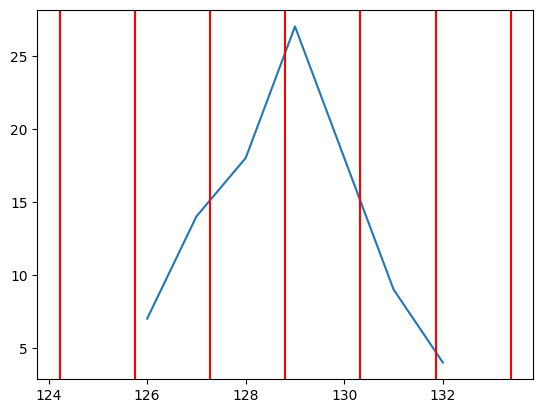

In [791]:
plt.plot(df_x['x_avg_i'], df_x['m_x'])
[plt.axvline(x_sample + sigma_x * i, color='red') for i in range(-3, 4)]

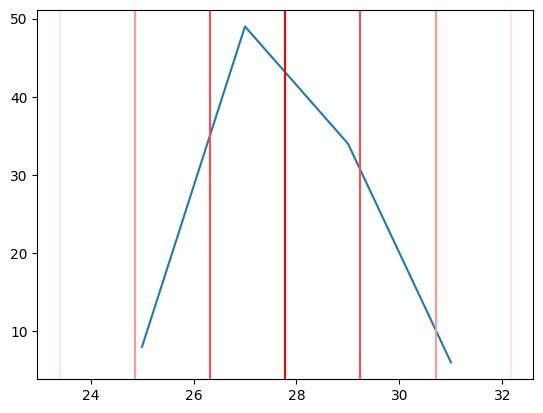

In [792]:
plt.plot(df_y['y_avg_i'], df_y['m_y'])
[plt.axvline(y_sample + sigma_y * i, color=(1, 0.3 * abs(i), 0.3 * abs(i))) for i in range(-3, 4)]

### Для x

In [793]:
t_1 = t.ppf(gamma_1, n - 1)
t_2 = t.ppf(gamma_2, n - 1)
(t_1, t_2)

(2.3658206896788494, 1.6608814403008005)

In [794]:
length = t_1 * sigma_x / n ** 0.5
confidence_interval_dispersion_unknown_x_1 = (x_sample - length, x_sample + length)
confidence_interval_dispersion_unknown_x_1

(128.43778429480255, 129.17046312787784)

In [795]:
length = t_2 * sigma_x / n ** 0.5
confidence_interval_dispersion_unknown_x_2 = (x_sample - length, x_sample + length)
confidence_interval_dispersion_unknown_x_2

(128.54694177847756, 129.06130564420283)

### Для y

In [796]:
length = t_1 * sigma_y / n ** 0.5
confidence_interval_dispersion_unknown_y_1 = (y_sample - length, y_sample + length)
confidence_interval_dispersion_unknown_y_1

(27.432948890829284, 28.13406141844907)

In [797]:
length = t_2 * sigma_y / n ** 0.5
confidence_interval_dispersion_unknown_y_2 = (y_sample - length, y_sample + length)
confidence_interval_dispersion_unknown_y_2

(27.53740349744973, 28.02960681182862)

## Доверительный интервал, дисперсия известна

In [798]:
big_f = lambda x: erf(x / 2 ** 0.5) / 2

In [799]:
z_1 = 0
for i in range(500):
    if np.abs(np.round(big_f(float(i / 100)), 3) - gamma_1 / 2) <= 0.001:
        z_1 = float(i / 100)
        break
z_1

2.55

In [800]:
z_2 = 0
for i in range(500):
    if np.abs(np.round(big_f(float(i / 100)), 3) - gamma_2 / 2) <= 0.001:
        z_2 = float(i / 100)
        break
z_2

1.96

### Для x

In [801]:
length = z_1 * sigma_x / n ** 0.5
confidence_interval_x_1 = (x_sample - length, x_sample + length)
confidence_interval_x_1

(128.4092647449585, 129.1989826777219)

In [802]:
length = z_2 * sigma_x / n ** 0.5
confidence_interval_x_2 = (x_sample - length, x_sample + length)
confidence_interval_x_2

(128.5006242705135, 129.1076231521669)

Вот такой занимательный результат

### Для y

In [803]:
length = z_1 * sigma_y / n ** 0.5
confidence_interval_y_1 = (y_sample - length, y_sample + length)
confidence_interval_y_1

(27.405658060556753, 28.1613522487216)

In [804]:
length = z_2 * sigma_y / n ** 0.5
confidence_interval_y_2 = (y_sample - length, y_sample + length)
confidence_interval_y_2

(27.493081505854253, 28.0739288034241)

Тоже занимательные результаты

## Доверительные интервалы для дисперсии

In [805]:
chi2_1_1 = chi2.ppf(1 - (1 - gamma_1) / 2, n - 1)
chi2_1_2 = chi2.ppf((1 - gamma_1) / 2, n - 1)

chi2_2_1 = chi2.ppf(1 - (1 - gamma_2) / 2, n - 1)
chi2_2_2 = chi2.ppf((1 - gamma_2) / 2, n - 1)

### Для x

In [806]:
sas = (n - 1) * s_2_x_corrected
confidence_interval_sigma_x_1 = (sas / chi2_1_2, sas / chi2_1_1)
confidence_interval_sigma_x_1

(3.4852755789432703, 1.6486252992947112)

In [807]:
confidence_interval_sigma_x_2 = (sas / chi2_2_2, sas / chi2_2_1)
confidence_interval_sigma_x_2

(3.154414380783104, 1.7862257655231741)

### Для y

In [808]:
sas = (n - 1) * s_2_y_corrected
confidence_interval_sigma_y_1 = (sas / chi2_1_2, sas / chi2_1_1)
confidence_interval_sigma_y_1

(3.1914297387367188, 1.5096286330959616)

In [809]:
confidence_interval_sigma_y_2 = (sas / chi2_2_2, sas / chi2_2_1)
confidence_interval_sigma_y_2

(2.8884636623719424, 1.6356279149429083)

## Проверка гипотез о законах распределения случайных величин

### Проверка гипотезы о том, что x распределена по нормальному закону

In [810]:
u_x = (x_intervals - x_sample) / s_2_x_corrected ** 0.5
u_x

array([-2.16654946, -1.51083871, -0.85512795, -0.19941719,  0.45629357,
        1.11200433,  1.76771508,  2.42342584])

In [811]:
f_x = big_f(u_x)
f_x

array([-0.48486539, -0.43458522, -0.30375984, -0.07903179,  0.17591056,
        0.36693185,  0.46144573,  0.49231255])

In [812]:
df_x['p_x']

0    0.072165
1    0.144330
2    0.185567
3    0.278351
4    0.185567
5    0.092784
6    0.041237
Name: p_x, dtype: float64

In [813]:
r_x = np.array([big_f(u_x[i + 1]) - big_f(u_x[i]) for i in range(N_x)])
r_x

array([0.05028016, 0.13082538, 0.22472805, 0.25494235, 0.1910213 ,
       0.09451387, 0.03086683])

In [814]:
chi2_x_observed = np.sum((df_x['p_x'] - r_x) ** 2 / r_x) * n
chi2_x_observed

2.285755523572441

In [815]:
chi2.ppf(0.9, N_x - 1 - 2)

7.779440339734858

In [816]:
chi2_x_observed < chi2.ppf(0.9, N_x - 1 - 2)

True

Наблюдаемая $ \chi_p^2\left(k\right) $ меньше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина X распределена по нормальному закону, верна.

### Проверка гипотез о законе распеределения y

##### Проверка гипотезы о том, что величина Y распределена по нормальному закону

In [817]:
u_y = (y_intervals - y_sample) / s_2_y_corrected ** 0.5
u_y

array([-2.59258233, -1.22211647,  0.1483494 ,  1.51881526,  2.88928113])

In [818]:
f_y = big_f(u_y)
f_y

array([-0.49523708, -0.38916821,  0.05896648,  0.4355955 ,  0.49806938])

In [819]:
r_y_gauss = np.array([big_f(u_y[i + 1]) - big_f(u_y[i]) for i in range(N_y)])
r_y_gauss

array([0.10606887, 0.44813469, 0.37662901, 0.06247388])

In [820]:
chi2_y_observed_gauss = np.sum((df_y['p_y'] - r_y_gauss) ** 2 / r_y_gauss) * n
chi2_y_observed_gauss

1.389076237935159

In [821]:
chi2.ppf(0.9, N_y - 1 - 2)

2.705543454095404

In [822]:
chi2_y_observed_gauss < chi2.ppf(0.9, N_y - 1 - 2)

True

Наблюдаемая $ \chi_p^2\left(k\right) $ больше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина Y распределена по нормальному закону, не верна.

##### Проверка гипотезы о том, что величина Y распределена по закону Пуассона

In [823]:
exponential = lambda x, l: l * np.e ** (-l * x)
exponential(1, 2)

0.2706705664732254

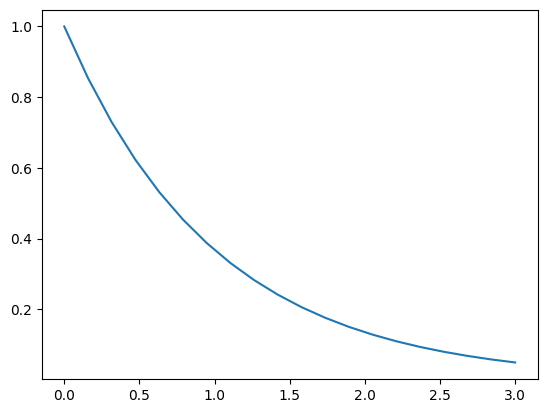

In [824]:
c = np.linspace(0, 3, 20)
fef = exponential(c, 1)
plt.plot(c, fef)

In [825]:
l = 1 / y_sample
l

0.03599257884972171

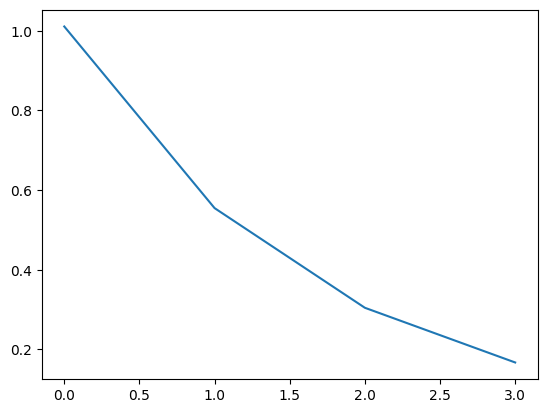

In [826]:
r_y_poisson = np.array(
    [exponential(y_intervals[i], 0.3) - exponential(y_intervals[i + 1], .3) for i in range(N_y)])
plt.plot(r_y_poisson * 1e4)

In [827]:
r_y_poisson * 1e4

array([1.01055249, 0.55460296, 0.30437256, 0.1670432 ])

In [828]:
df_y['p_y']

0    0.082474
1    0.505155
2    0.350515
3    0.061856
Name: p_y, dtype: float64

In [829]:
chi2_y_observed_poisson = np.sum((df_y['p_y'] - r_y_poisson * 1e4) ** 2 / (r_y_poisson * 1e4)) * n
chi2_y_observed_poisson

90.20766586034817

In [830]:
chi2.ppf(0.9, N_y - 1 - 1)

4.605170185988092

In [831]:
chi2_y_observed_poisson < chi2.ppf(0.9, N_y - 1 - 1)

False

Наблюдаемая $ \chi_p^2\left(k\right) $ больше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина Y распределена по закону Пуассона, не верна.

##### Проверка гипотезы о том, что величина Y распределена по равномерному закону

In [832]:
r_y_N = np.array([1 / N_y for i in range(N_y)])
r_y_N

array([0.25, 0.25, 0.25, 0.25])

In [833]:
chi2_y_observed_N = np.sum((df_y['p_y'] - r_y_N) ** 2 / r_y_N) * n
chi2_y_observed_N

53.804123711340196

In [834]:
chi2_y_observed_N < chi2.ppf(0.9, N_y - 1 - 1)

False

Наблюдаемая $ \chi_p^2\left(k\right) $ меньше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина Y распределена по равномерному закону, может быть верна, но для неё $ \chi_{набл}^2 $ больше, чем та же величина, вычисленная при проверке гипотезы о том, что Y распределена по нормальному закону.

# Lab №8

## Проверка гипотезы о виде связи между X и Y

In [835]:
t_observed = r_sample * np.sqrt(n - 2) / np.sqrt(1 - r_sample ** 2)
t_observed

13.033265648759148

In [836]:
t_observed < t.ppf(0.9, n - 2)

False

$ |T_{набл} |≥T_p (k) $, значит, X и Y связаны линейно.

## Метод наименьших квадратов для линейной регрессии

In [837]:
def cool_regression(x, y, scale: int = 2):
    matrix = []
    for i in range(scale):
        coefs_i = []
        for j in range(i, i + scale):
            coefs_i.append(np.sum(np.power(x, j)))
        matrix.append(coefs_i)
    vec = [np.sum(y.reshape(len(x), ) * np.power(x, i)) for i in range(scale)]
    return np.linalg.solve(matrix, vec)

In [854]:
def not_so_cool_regression_linear(x, y):
    a = r * s_2_y ** .5 / s_2_x ** .5
    b = np.average(y) - a * np.average(x)
    return np.array([b, a])

In [839]:
def cool_function(x, coefficients):
    return sum(coefficients[i] * x ** i for i in range(len(coefficients)))

In [853]:
cool_regression(x, y)

array([-67.08523409,   0.73229292])

In [855]:
not_so_cool_regression_linear(x, y)

array([-66.11283876,   0.72474351])

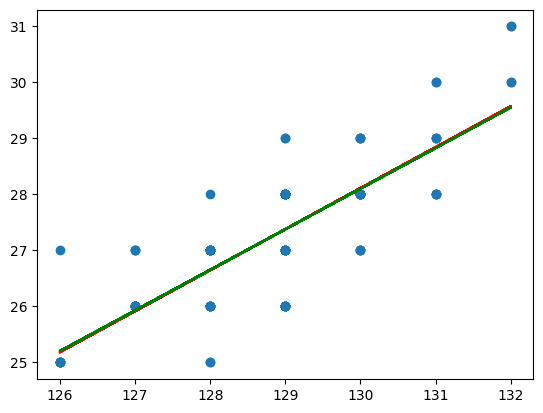

In [856]:
coefficients = cool_regression(x, y)
coefficients_not_cool = not_so_cool_regression_linear(x, y)
y_estimate = cool_function(x, coefficients)
y_estimate_not_cool = cool_function(x, coefficients_not_cool)
plt.plot(x, y_estimate, color='red')
plt.plot(x, y_estimate_not_cool, color='green')
plt.scatter(x, y)

In [857]:
np.sum(np.abs(y_estimate_not_cool - y_estimate)) / n

0.009239985442781531

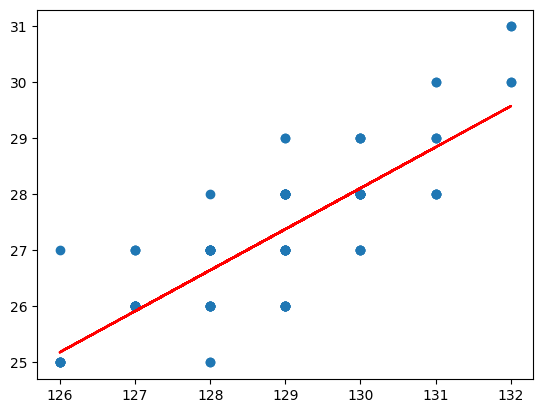

In [844]:
coefficients = cool_regression(x, y, scale=3)
y_estimate_2 = cool_function(x, coefficients)
plt.plot(x, y_estimate_2, color='red')
plt.scatter(x, y)

Среднеквадратическое отклонение между двумя полученными функциями

In [845]:
error = np.sqrt(np.sum(np.power(y_estimate - y_estimate_2, 2))) / n
error

5.347729081535445e-10

In [846]:
np.round(error, 5) == 0

True

Среднеквадратическое отклонение между реальными данными и полученной функцией

In [847]:
error = np.sqrt(np.sum(np.power(y - y_estimate, 2))) / n
error

0.07973060516876657